## Week 5 : Support Vector Machines
```
- Machine Learning, Innopolis University (Fall semester 2022)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. SVM Recap
2. SVM implementation
3. SVM kernel types
4. Application
```

<hr>

## 1. Recap

1. What is SVM? Is it used for classification or regression?
<span style="color:blue">Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

2. What are Support Vectors?
<span style="color:blue">Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

3. What is a Hyperplane?
<span style="color:blue">A hyperplane is a decision plane which separates between a set of objects having different class memberships.

4. What is a Margin?
<span style="color:blue">A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

5. How does SVM work?
<span style="color:blue">The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 

### 1.1 Problem Statement

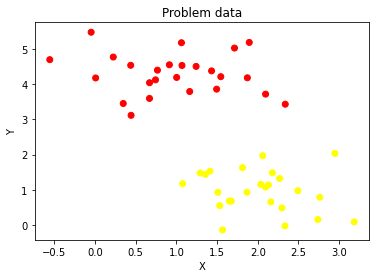

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from scipy import stats

# Import data and visualize
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem data")
plt.show()

How can we create a data separation rule to later use? Draw a line and use that line's equation as the separation rule... **simple intuition**

### 1.2 Solution (1)
Draw 3 lines separating the data points. Test data point is marked **X**

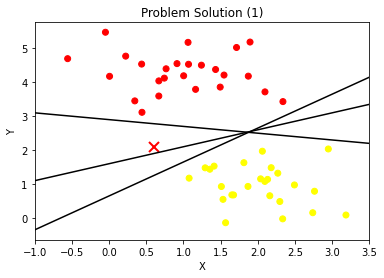

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem Solution (1)")
plt.xlim(-1, 3.5)
plt.show()

**<span style="color:red">Can we see problem with solution (1) ?**

**<span style="color:blue">Solution to problem** : 
We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

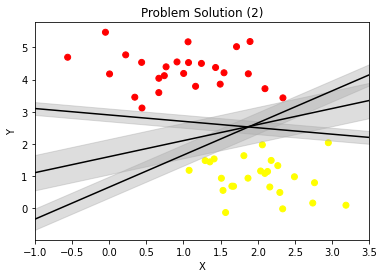

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problem Solution (2)")
plt.xlim(-1, 3.5)
plt.show()

## 2. Support vector classifier

Now we will see our previous solution from sklearn SVM implementation. 

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

**<span style="color:red">How can we see the data separation rule from our model ?**
    
The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  `.𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗()`  method of the `SVC`

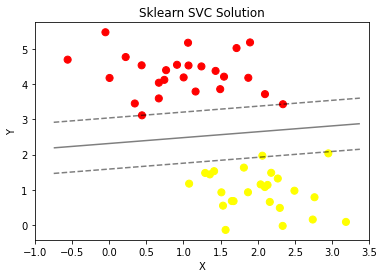

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sklearn SVC Solution")
plt.xlim(-1, 3.5)
plt.show()

**Note :** SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes `support_vectors_`, `support_` and `n_support_`:

In [6]:
print("Support vectors: ", model.support_vectors_) # get support vectors
print("indices of support vectors: ",model.support_) # get indices of support vectors
print("number of support vectors for each class: ",model.n_support_) # get number of support vectors for each class

Support vectors:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
indices of support vectors:  [18 25  7]
number of support vectors for each class:  [2 1]


The  `𝚌`  argument allows us to specify the cost of a violation to the margin. When the  `𝚌`  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  `𝚌`  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best `𝚌` argument? 
<span style="color:blue"> Using cross validation

## Problem visualization

In [7]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import pandas as pd

In [8]:
def plot_data(df, ax, title):
    grouped = df.groupby('label')
    
    colors = ["red", "blue"]
    labels = ["class A", "class B"]
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=labels[key], color=colors[key])
    ax.set_title(title)

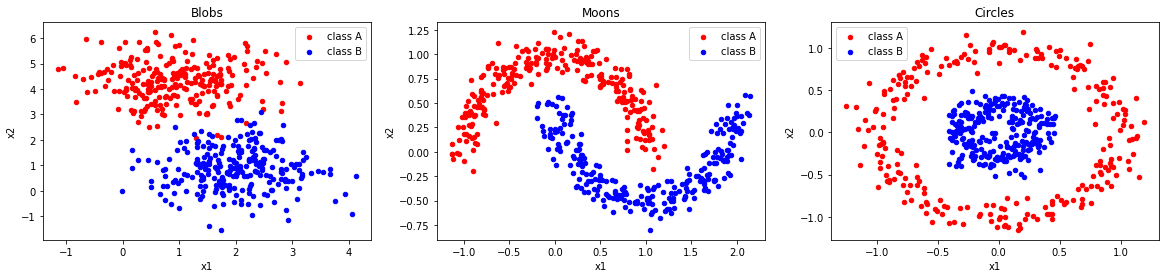

In [9]:
# here we assign values for constants
n_samples = 500
C_const = 100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
df_blob = pd.DataFrame(dict(x1=X_blob[:,0], x2=X_blob[:,1], label=Y_blob))
plot_data(df_blob, ax1, "Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
df_moon = pd.DataFrame(dict(x1=X_moon[:,0], x2=X_moon[:,1], label=Y_moon))
plot_data(df_moon, ax2, "Moons")

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
df_circle = pd.DataFrame(dict(x1=X_circle[:,0], x2=X_circle[:,1], label=Y_circle))
plot_data(df_circle, ax3, "Circles")

plt.show()

## 3. SVM Kernels 

1. What is called a kernel trick? <span style="color:blue"> It is when instead of searching hyperplane in the initial space, we are searching it in some higher-dimensional space, where projected points are linearly separable. It is called a trick because we don't actually have to project points to that space - if we know how to compute their inner products there, this is enough => saves a lot of time. </span>

### Most popular kernel types

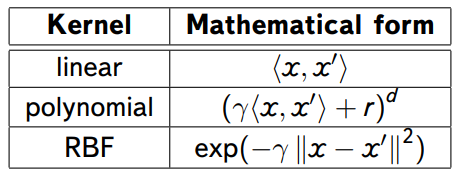



In [10]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [11]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(20,4))

    linear_model = SVC(kernel='linear')
    linear_model.fit(X, Y)
    plt.subplot(131)
    plt.title("Linear kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(linear_model)

    rbf_model = SVC(kernel='rbf')
    rbf_model.fit(X, Y)
    plt.subplot(132)
    plt.title("RBF kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(rbf_model)

    poly_model = SVC(kernel='poly')
    poly_model.fit(X, Y)
    plt.subplot(133)
    plt.title("Polynomial kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(poly_model)
    plt.show()

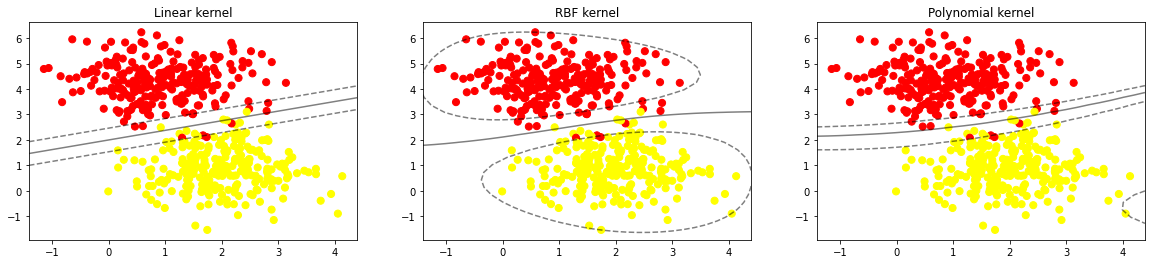

In [12]:
test_kernels(X_blob, Y_blob)

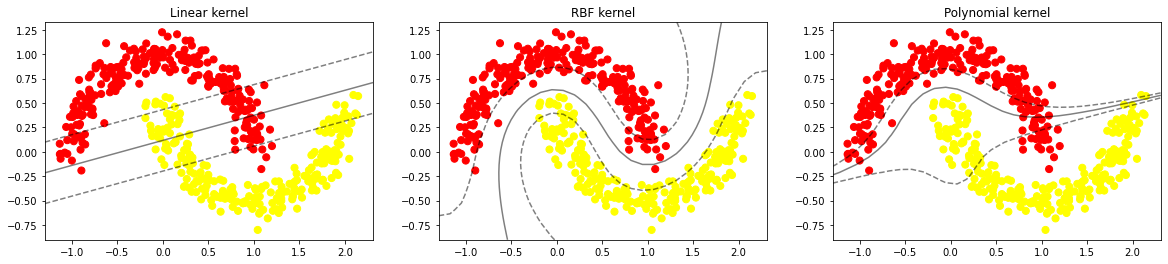

In [13]:
test_kernels(X_moon, Y_moon)

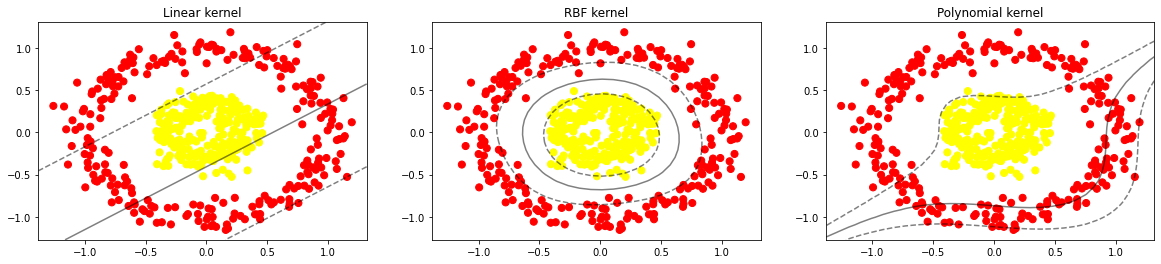

In [14]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.



<!-- ![alt text](http://cs604525.vk.me/v604525210/afd4/xuJnTRcY43g.jpg) -->

In [15]:
def test_kernel(kernel, X, Y, C=1, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X, Y)
    plt.title(kernel + " kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(model)

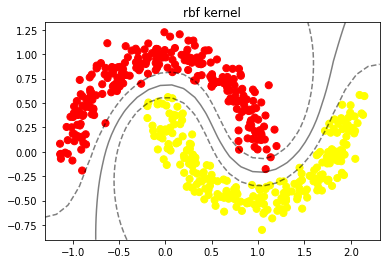

In [16]:
# Manually tune parameters for the moons dataset, plotting the result
test_kernel('rbf', X_moon, Y_moon, C=20, gamma=1)

## <center>Self-practice Task</center> 

Using the data from Assignment 1 classification task filter out the minor class and use One class SVM to predict the stream quality.

<b>Note : Do not use the whole training dataset but just sample 10-20% to train the one class svm<b>